In [1]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define number of samples
num_samples = 100

# Generate synthetic data
carbon_emissions = np.random.uniform(50, 400, num_samples)  # Emissions in hypothetical units
energy_output = np.random.uniform(100, 1000, num_samples)   # Energy output in hypothetical units
renewability_index = np.random.uniform(0, 1, num_samples)   # Index from 0 (non-renewable) to 1 (fully renewable)
cost_efficiency = np.random.uniform(0.5, 5, num_samples)    # Cost efficiency score

# Generating a binary target variable based on a condition
# This is just an example: high renewability and low emissions favor sustainability
sustainability = [
    1 if (emission < 200 and renewability > 0.5 and cost < 3) else 0
    for emission, renewability, cost in zip(carbon_emissions, renewability_index, cost_efficiency)
]

# Create DataFrame
data = pd.DataFrame({
    'carbon_emissions': carbon_emissions,
    'energy_output': energy_output,
    'renewability_index': renewability_index,
    'cost_efficiency': cost_efficiency,
    'sustainability': sustainability
})

# Display the first few rows
print(data.head())

# Optionally, save to CSV for later use
data.to_csv('green_tech_data.csv', index=False)


   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv('green_tech_data.csv')
# Inspect for missing values and general structure
print(data.head())
print(data.isnull().sum())
# Handle missing values if necessary
data.fillna(data.mean(), inplace=True)

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  
carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [4]:
# Example feature selection
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']  # Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [9]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


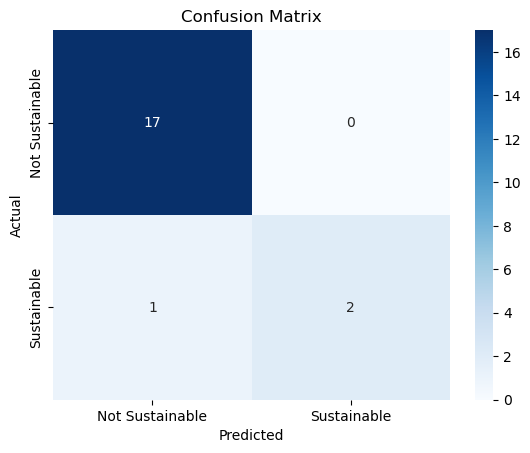

In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Sustainable', 'Sustainable'], 
            yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [12]:
# Feature importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560
